# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re




%matplotlib inline

load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Read your api key environment variable

api_key = os.getenv("NEWSAPI")

In [3]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=os.environ["NEWSAPI"])

In [4]:
# Fetch the Bitcoin news articles

bitcoin = newsapi.get_everything(q="bitcoin", sort_by="relevancy", language = "en")

In [5]:
# Fetch the Ethereum news articles

ethereum = newsapi.get_everything(q="ethereum", sort_by="relevancy", language = "en")

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)
btc_df

,text,date,compound,positive,negative,neutral
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772
3,"As a kid, I remember when my father tried to u...",2022-05-16,0.3818,0.114,0.052,0.833
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928
5,If youve ever felt like introducing some Vegas...,2022-05-05,0.7506,0.193,0.000,0.807
6,Cryptocurrency mixers are sometimes used to he...,2022-05-06,-0.4404,0.202,0.241,0.557
7,Photo Illustration by Grayson Blackmon / The V...,2022-05-24,-0.4767,0.000,0.103,0.897
8,Posted \r\nFrom Bitcoin's dramatic drop to a n...,2022-05-10,-0.3612,0.000,0.123,0.877
9,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",2022-05-11,-0.3818,0.000,0.077,0.923


In [7]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(ethereum_sentiments)
eth_df

,text,date,compound,positive,negative,neutral
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954
5,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",2022-05-25,0.0258,0.034,0.000,0.966
6,There's a new metaverse project from the creat...,2022-05-01,-0.2732,0.000,0.063,0.937
7,Editorial IndependenceWe want to help you make...,2022-05-09,0.6908,0.178,0.000,0.822
8,"40 days ago Bitcoin sold for $47,454. It's pri...",2022-05-09,-0.6908,0.000,0.178,0.822
9,When Nvidia launched its Ampere Lite Hash Rate...,2022-05-15,-0.3818,0.069,0.085,0.847


In [8]:
# Describe the Bitcoin Sentiment

btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.086820,0.059550,0.079250,0.861150
std,0.399974,0.062411,0.078304,0.105209
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.039000,0.827000
50%,-0.114750,0.049000,0.062000,0.888000
75%,0.156025,0.085000,0.103750,0.930250
max,0.750600,0.202000,0.300000,0.964000


In [9]:
# Describe the Ethereum Sentiment

eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.088800,0.032800,0.048600,0.918700
std,0.343530,0.051042,0.043472,0.051321
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.875500
50%,-0.153100,0.000000,0.050000,0.935000
75%,0.045025,0.051750,0.069000,0.955000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin** has the highest mean positive score (0.059550) while the positive score for  Ethereum was 0.037850.

Q: Which coin had the highest compound score?

A: **Bitcoin** has the highest compound score with a max of 0.750600. Ethereum's max compound score is 0.690800.

Q. Which coin had the highest positive score?

A: **Bitcoin** has the highest positive score with a max of 0.202000, while Ethereum max positive score is 178000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk

In [11]:
# Instantiate the lemmatizer

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

import nltk
nltk.download('stopwords')

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    re_clean = re.compile("[^a-zA-Z ]").sub('', text)
  
    # Create a tokenized list of the words
    words = word_tokenize(re_clean) 
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    lowercase_words = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    # Remove the stop words
    
    
    return lowercase_words

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(word_tokenize)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[Now, ,, even, though, there, are, a, number, ..."
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882,"[A, Bitcoin, mining, site, powered, by, otherw..."
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, has, always, been, a, bitcoi..."
3,"As a kid, I remember when my father tried to u...",2022-05-16,0.3818,0.114,0.052,0.833,"[As, a, kid, ,, I, remember, when, my, father,..."
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928,"[Image, source, ,, Getty, Images, The, value, ..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(word_tokenize)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865,"[Meta, has, revealed, more, of, how, NFTs, wil..."
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960,"[GameStop, has, officially, thrown, itself, he..."
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[A, multi-billion, dollar, cryptocurrency, com..."
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[When, Bored, Ape, Yacht, Club, creators, Yuga..."
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954,"[GameStop, is, going, all-in, on, crypto, ., T..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

bitcoin_ngrams = ngrams(
    tokenizer(' '.join(btc_df['text'])),
    n=2,
)
list(bitcoin_ngrams)[:5] 

[('even', 'though'),
 ('though', 'number'),
 ('number', 'womenfocused'),
 ('womenfocused', 'crypto'),
 ('crypto', 'space')]

In [17]:
# Generate the Ethereum N-grams where N=2

ethereum_ngrams = ngrams(
    tokenizer(' '.join(eth_df['text'])),
    n=2,
)
list(ethereum_ngrams)[:5] 

[('meta', 'ha'),
 ('ha', 'revealed'),
 ('revealed', 'nfts'),
 ('nfts', 'work'),
 ('work', 'instagram')]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(btc_df.text.str.cat()), N=10)

[('bitcoin', 11),
 ('cryptocurrency', 10),
 ('world', 6),
 ('week', 6),
 ('reuters', 5),
 ('ha', 4),
 ('investor', 4),
 ('biggest', 4),
 ('charsmay', 4),
 ('last', 3)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df.text.str.cat()), N=10)

[('cryptocurrency', 11),
 ('ha', 8),
 ('bitcoin', 6),
 ('ethereum', 5),
 ('nft', 5),
 ('last', 5),
 ('world', 5),
 ('digital', 4),
 ('sale', 4),
 ('biggest', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

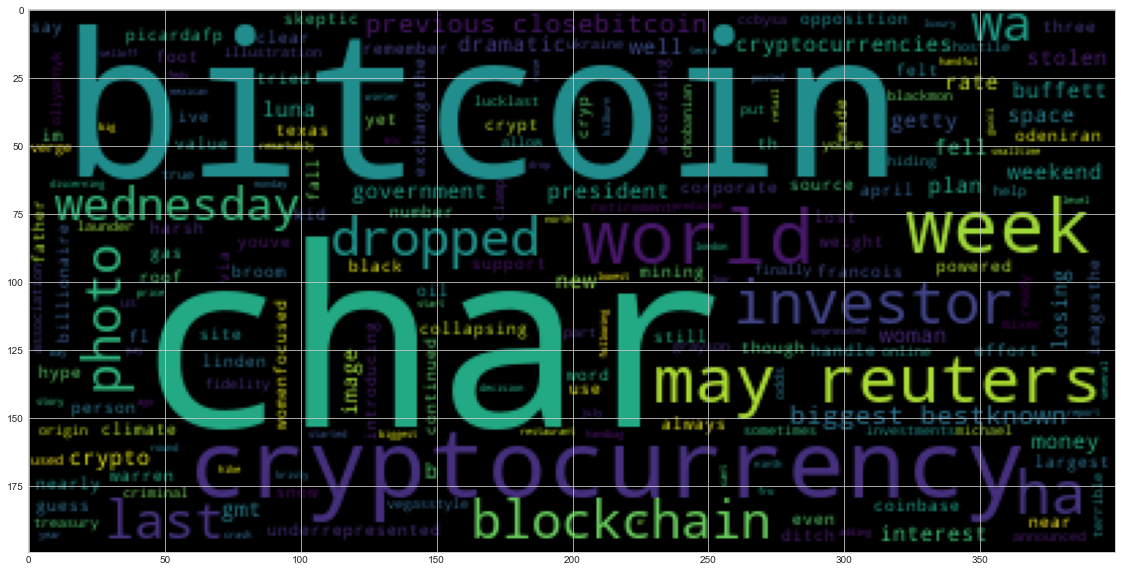

In [22]:
# Generate the Bitcoin word cloud

wc_btc = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(btc_df['text']))
    )
)
plt.imshow(wc_btc);

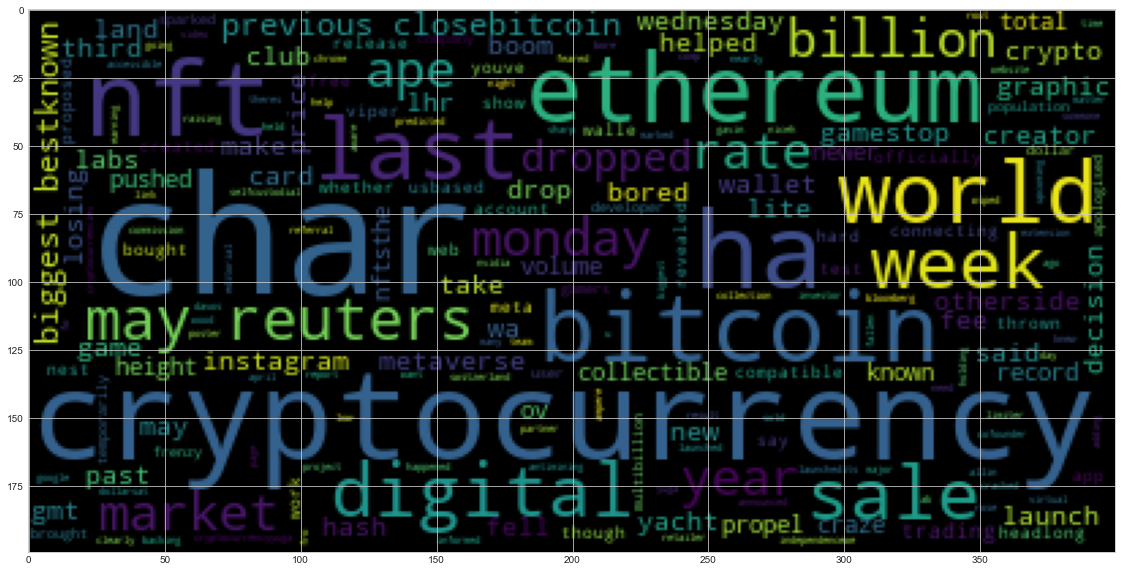

In [23]:
# Generate the Ethereum word cloud

wc_eth = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(eth_df['text']))
    )
)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_doc = ' '.join(btc_df['text'])

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(str(btc_df['text']))

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin Ner'

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Warren Buffett',
 'Getty Images\\r\\nThe',
 'Bit',
 '6',
 'Grayson Blackmon',
 'Bitcoin',
 '9',
 'May 11',
 'Reuters',
 '7.23%',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862',
 'last July',
 '12',
 'May 9',
 'Reuters',
 '7.81%',
 '31',
 'Mexican',
 'North London',
 '14',
 'May 24',
 'Reuters',
 'May 10',
 'Reuters',
 'The Central African Republic',
 'bitco',
 '17',
 'two',
 'Sam Bankman-Fried']

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_doc = ' '.join(eth_df['text'])

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(str(eth_df['text']))

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum Ner'

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [34]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['0     Meta',
 'Yacht Club',
 'Yuga Labs',
 'GameStop',
 'Switzerland',
 'May 25',
 'Reuters',
 '6',
 '40 days ago',
 '47,454',
 'pri',
 'Nvidia',
 'Ampere Lite Hash Rate',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862',
 '11',
 'May 11',
 'Reuters',
 '7.23%',
 '12',
 'May 9',
 'Reuters',
 '7.81%',
 '31',
 '13',
 '8',
 '14',
 'NFT',
 'last July',
 'the past few year',
 '17',
 'ApeCoin',
 'APE',
 'Getty Images\\r\\nThe',
 'Bit',
 'the past few year']

---